# CIIC5015: Intro to Artificial Intelligence
### Example 2: Intro to PyTorch & Numpy - Adding bias to our regression problem
#### Import the necessary libraries
- PyTorch
- Numpy
- Matplotlib

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Generate Synthetic Data
This is done by using the `arange()` function that is included in PyTorch, we create an array of values from [-5, 5] with each new value having a step of 0.1. We then take and convert this into a N x 1 Tensor, where N in this case will be 100

In [2]:
"""
torch.arange(-5, 5, 0.1)
Return a 1D tensor that has values from -5, 5 with a step of 0.1 in between each value

.view(-1, 1)
Return a 2D tensor that has 1 column and compute the appropriate 
number of rows that is necessary to make this happen (we specify this with the -1). 
In this case, the appropriate number of rows is 100
"""
data = torch.arange(-5, 5, 0.1).view(-1, 1)
print(f"data.shape = {data.shape}")
print(f"data: {data}")

data.shape = torch.Size([100, 1])
data: tensor([[-5.0000e+00],
        [-4.9000e+00],
        [-4.8000e+00],
        [-4.7000e+00],
        [-4.6000e+00],
        [-4.5000e+00],
        [-4.4000e+00],
        [-4.3000e+00],
        [-4.2000e+00],
        [-4.1000e+00],
        [-4.0000e+00],
        [-3.9000e+00],
        [-3.8000e+00],
        [-3.7000e+00],
        [-3.6000e+00],
        [-3.5000e+00],
        [-3.4000e+00],
        [-3.3000e+00],
        [-3.2000e+00],
        [-3.1000e+00],
        [-3.0000e+00],
        [-2.9000e+00],
        [-2.8000e+00],
        [-2.7000e+00],
        [-2.6000e+00],
        [-2.5000e+00],
        [-2.4000e+00],
        [-2.3000e+00],
        [-2.2000e+00],
        [-2.1000e+00],
        [-2.0000e+00],
        [-1.9000e+00],
        [-1.8000e+00],
        [-1.7000e+00],
        [-1.6000e+00],
        [-1.5000e+00],
        [-1.4000e+00],
        [-1.3000e+00],
        [-1.2000e+00],
        [-1.1000e+00],
        [-1.0000e+00],
        [-9.0000e

### Real Value Function
Here, we define the function that represents our ideal model with `ideal_model`. Then, in a separate variable, we add fake noise to the model to simulate that the model made some predictions on its own.

In [3]:
ideal_model = -5 * data
predictions = ideal_model + 0.4 * torch.rand(data.size()) # Add fake noise to every value of X using torch.rand()

### Matplotlib Graph
Now, to take a look at our model and data it "predicted" we use Matplotlib to graph everything.

In [4]:
print(f"data.shape: {data.shape}")
print(f"predictions.shape: {predictions.shape}")

data.shape: torch.Size([100, 1])
predictions.shape: torch.Size([100, 1])


First, we convert the data, the model and the predictions to Numpy arrays so we can plot them. Then we tell Matplotlib to take those arrays and plot them in their correspoding axis.

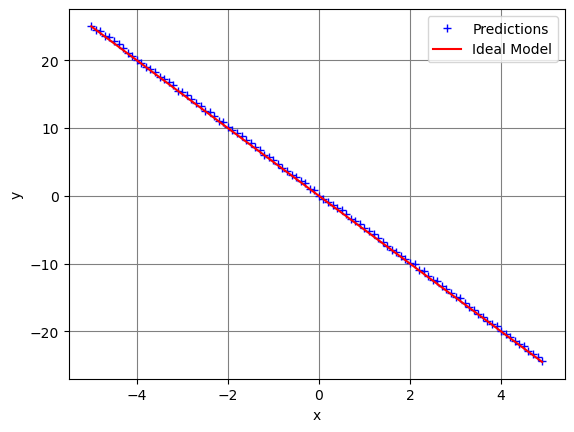

In [5]:
# Convert torch arrays to numpy arrays and plot it
plt.plot(data.numpy(), predictions.numpy(), 'b+', label="Predictions") # (Given Data) Shown as + symbols
plt.plot(data.numpy(), ideal_model.numpy(), 'r', label="Ideal Model") # (Ideal Model)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, color='grey')
plt.show()


### Weight & Bias
Now, we define the parameters the moel will use, the weight & bias. This will be a scalar tensor of -10.0 & -20.0 respectively, and we indicate that it should record all operations made on the tensor with `requires_grad`.

Our predictions will be of the following form: $$ Y = wX + b - model $$

Where $Y$ is the predicted Tensor value, $w$ is the weight, $X$ is the input Tensor, $b$ is the bias & $model$ is the input model

We also define the following functions:
- `forward(model: Tensor) -> Tensor`
    - Returns the model modified by a factor of `w` (which is the weight)
- `criterion(prediction: Tensor, real_value: Tensor) -> float` 
    - Returns the mean square error of the prediction the model made against its actual value

In [6]:
w = torch.tensor(-10.0, requires_grad=True)
bias = torch.tensor(-20.0, requires_grad=True)

# Model Function
def forward(model):
    return w * model + bias

# Mean Squared Error Loss Function
def criterion(prediction, real_value):
    return torch.mean((prediction - real_value)**2)


### Create the hyperparameters to train model
Here, we define three hyperparameters we will tinker manually to adjust the model training:
-  `learning_rate`: How fast or slow the model will adjust its parameters based on the gradient descent algorithm
- `epochs`: The number of iterations we will make to train the model
- `loss_list`: A Python list to store previously compute loss values. This is to see how the loss changes as training is done on the model. It is expected that all the values in this list converge to 0 as N approaches the number of epochs specified.

In [7]:
learning_rate = 0.1
epochs = 20
loss_list = [] # Store computed loss values per epoch

### Standard Training Loop
Here, we create the main loop to train our model. The algorithm to train is as follows:
```
for i = 0 to number of epochs:
    cur_prediction: make a prediction using the data stored
    computed_loss: Compute the mean square error of the prediction against its real value
    Add computed_Loss value to the loss_list
    Update the values and parameters of the computed loss
    Do Gradient Descent to update the weight value & reset the graident to 0 for the next iteration
    Output values computed in ith iteration
```

In [9]:
print(f"i \t Computed Loss \t Updated Weight \t Updated Bias")
for i in range(epochs):
    # Make a prediction using data stored in X
    cur_prediction = forward(data)

    # Compute loss from prediction (Y_pred) and actual value (Y)
    loss = criterion(cur_prediction, ideal_model)

    # Store computed loss value
    loss_list.append(loss.item())

    # Propagate values & parameters
    loss.backward()

    # Update weight & bias
    w.data = w.data - learning_rate * w.grad.data # Graident Descent by hand: w = w - alpha * (dJ/dw)
    bias.data = bias.data - learning_rate * bias.grad.data # Graident Descent by hand: b = b - alpha * (dJ/db)

    w.grad.data.zero_() # Reset weight gradient to 0
    bias.grad.data.zero_() # Reset bias gradient to 0

    print(f"{i} \t{loss.item()} \t{w.item()} \t{bias.item()}")


i 	 Computed Loss 	 Updated Weight 	 Updated Bias
0 	0.053530026227235794 	-5.000274181365967 	-0.1851109266281128
1 	0.03426152840256691 	-5.001668453216553 	-0.14809152483940125
2 	0.02192964404821396 	-5.000368118286133 	-0.11848986893892288
3 	0.014036664739251137 	-5.00093936920166 	-0.09479553997516632
4 	0.008984606713056564 	-5.000321388244629 	-0.075845867395401
5 	0.005750999320298433 	-5.00054407119751 	-0.06067993491888046
6 	0.0036812573671340942 	-5.000243663787842 	-0.04854932799935341
7 	0.0023563671857118607 	-5.0003228187561035 	-0.038841862231492996
8 	0.0015082932077348232 	-5.000173091888428 	-0.031076747924089432
9 	0.0009654661407694221 	-5.000195503234863 	-0.024863161146640778
10 	0.0006179956253618002 	-5.000118255615234 	-0.019892539829015732
11 	0.0003955848515033722 	-5.000120162963867 	-0.015915263444185257
12 	0.00025321627617813647 	-5.000079154968262 	-0.012733465060591698
13 	0.000162093187100254 	-5.00007438659668 	-0.010187558829784393
14 	0.00010375

### Plot computed loss values during training to see if loss converged to 0 during training

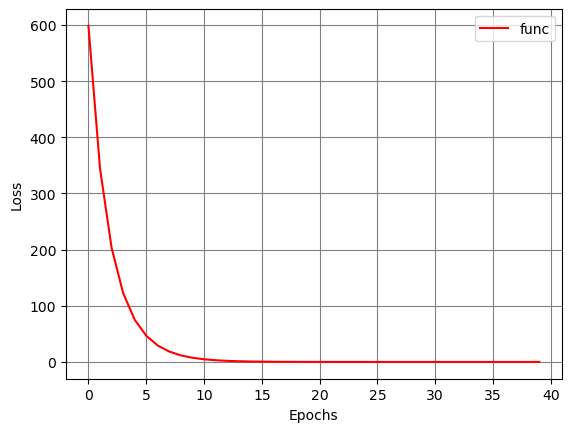

In [10]:
plt.plot(loss_list, 'r', label="func") # Plot the loss function in red color
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, color='grey')
plt.show()